[MicroscopyGPT: Generating Atomic-Structure Captions from Microscopy Images of 2D Materials with Vision-Language Transformers](https://pubs.acs.org/doi/10.1021/acs.jpclett.5c01257)

Author email: kchoudh2@jhu.edu



In [1]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [1]:
# %%time
# import os
# os.chdir('/content')
# !rm -rf Software
# os.makedirs('/content/Software')
# os.chdir('/content/Software')
# !pip install uv
# if not os.path.exists('atomgpt'):
#   !rm -rf atomgpt
#   !git clone https://github.com/atomgptlab/atomgpt.git
#   os.chdir('atomgpt')
#   !uv pip install -q -e .

import yaml

# Load the YAML file
with open("credential.yaml", "r") as f:
    cred = yaml.safe_load(f)

api_key = cred["atomGPT-api-key"]


In [2]:
# Check imports
import sys
sys.path.append("atomgpt/")
import atomgpt
import os
os.environ.pop('MPLBACKEND', None)  # Remove the invalid backend
import matplotlib
matplotlib.use('Agg')  # Use a compatible backend
import matplotlib.pyplot as plt
os.chdir('atomgpt')


## Pretrained model inference

Let's try the model on FeTe (a superconducting material) STEM data.

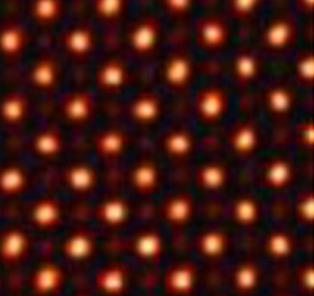

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
#Input Image of FeTe from: https://www.nature.com/articles/s41467-020-17253-x
Image('atomgpt/examples/inverse_model_vision/FeTe.png')

See the pred_system POSCAR file printed below. You can visualize in VESTA or similar software.

In [4]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/FeTe.png --formula FeTe

Standard import failed for AtomGPTCPOTrainer: No module named 'AtomGPTCPOTrainer'. Using tempfile instead!
Traceback (most recent call last):
  File "/lustre/isaac24/scratch/upratius/projects/pyAutoMic/TEM/stemOrchestrator/notebooks/atomGPT_related/atomgpt/atomgpt/inverse_models/compiler.py", line 469, in create_new_function
    new_module, old_path = import_module(compile_folder, name)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lustre/isaac24/scratch/upratius/projects/pyAutoMic/TEM/stemOrchestrator/notebooks/atomGPT_related/atomgpt/atomgpt/inverse_models/compiler.py", line 463, in import_module
    new_module = importlib.import_module(name)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/sw/isaac/applications/anaconda3/2023.09/rhel8_cascadelake_binary/anaconda3-2023.09/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The model generates atomic structure in the POSCAR format as shown above

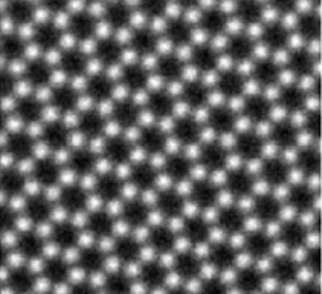

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
#Input Image of graphene (C)
Image('atomgpt/examples/inverse_model_vision/C.png')

Similarly lets try in graphene

In [ ]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/C.png --formula C

AtomGPT 2025.5.7: Fast Mllama patching. Transformers: 4.51.3.
Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]

Loading checkpoint shards: 100% 2/2 [00:37<00:00, 18.55s/it]

🔍 Running evaluation on samples...
pred_atoms System
1.0
3.17 0.0 0.0
-1.53685 2.77254 0.0
0.0 0.0 15.0
C 
2 
direct
0.0 0.0 0.5 C
0.667 0.333 0.5 C


CPU times: user 420 ms, sys: 68.7 ms, total: 488 ms
Wall time: 1min 30s


Now lets try it on MoS2

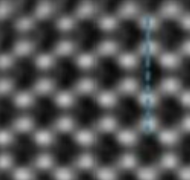

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
#Input Image of MoS2
Image('atomgpt/examples/inverse_model_vision/MoS2.png')

In [ ]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/MoS2.png --formula MoS2

AtomGPT 2025.5.7: Fast Mllama patching. Transformers: 4.51.3.
Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]

Loading checkpoint shards: 100% 2/2 [00:34<00:00, 17.30s/it]

🔍 Running evaluation on samples...
pred_atoms System
1.0
3.18 0.0 0.0
-1.54169 2.78129 0.0
0.0 0.0 18.76
Mo S 
1 2 
direct
0.0 0.0 0.5 Mo
0.667 0.333 0.587 S
0.333 0.667 0.413 S


CPU times: user 464 ms, sys: 68.4 ms, total: 533 ms
Wall time: 1min 31s


##Training example.

Note you might have to restart session because of limited memory on colab.

Change dft_2d to c2db or alex_pbe_2d_all if you need larger training set as given here https://atomgptlab.github.io/jarvis-tools/databases/.

Remove max_samples command to train on entire dataset

In [ ]:
%%time
!python atomgpt/inverse_models/inverse_vision.py --dataset dft_2d --max_samples 10

In [ ]:
!pip freeze

accelerate==1.7.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
annotated-types==0.7.0
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1708969572489/work
ase==3.25.0
async-timeout==5.0.1
-e git+https://github.com/usnistgov/atomgpt.git@d9f35797c9a666a82efbdc8b3b58af3c78325030#egg=atomgpt
attrs==25.3.0
bitsandbytes==0.45.5
black==25.1.0
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1733827268945/work
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1725267488082/work
certifi==2025.4.26
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1725560564262/work
charset-normalizer==3.4.2
click==8.2.1
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1733218098505/work
conda @ file:///home/conda/feedstock_root/build_artifacts/conda_1735996947529/work
conda-libmamba-solver @ file:///home/conda/feedstock_root/build_artifacts/conda-libmamba-solver_1727359833193/work/src
conda-package-handlin